<a href="https://colab.research.google.com/github/SanyaKapoor/Classification/blob/main/Multiclass_Classification_with_SVM(Finding_the_best_value_for_C_for_each_degree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import pandas as pd 
data = pd.read_csv("iris.csv")
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
data.rename(columns = {'5.1':'Feature1','3.5':'Feature2','1.4':'Feature3','0.2':'Feature4','Iris-setosa':'Class'}, inplace = True)
data.head()

,Feature1,Feature2,Feature3,Feature4,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
from sklearn.model_selection import train_test_split
Y = data.Class
X = data[['Feature1', 'Feature2','Feature3','Feature4']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 47, test_size = 0.25)

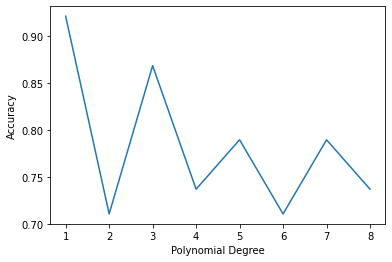

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
l = [1,2,3,4,5,6,7,8]
accuracies = []
for i in l:
  clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=i))
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  a = accuracy_score(y_test, y_pred)
  accuracies.append(a)

import matplotlib.pyplot as plt
plt.plot(l,accuracies)
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.show()

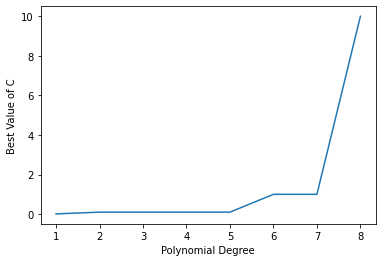

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
l = [1,2,3,4,5,6,7,8]
best = []
for i in l:
  flag = 0
  c = 0.01
  latest = 100.000
  while(flag == 0):
    clf = make_pipeline(StandardScaler(), SVC(C=c, kernel='poly', degree=i, gamma='auto'))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    err = 1-accuracy_score(y_test, y_pred)
    if(latest>err):
      latest = err
      c = c*10
    else:
      flag = 1
      best.append(c/1000)

import matplotlib.pyplot as plt
plt.plot(l,best)
plt.xlabel('Polynomial Degree')
plt.ylabel('Best Value of C')
plt.show()